In [1]:
from classes.Settings import Settings
from classes.Devices import Devices
from classes.Nodes import Nodes
from classes.Resistors import Resistors
from classes.VoltageSources import VoltageSources
from classes.CurrentSources import CurrentSources
from classes.VoltageSources import CurrentSensors
from classes.Inductors import Inductors
from lib.solve import solve
from matplotlib import pyplot as plt 
from lib.parse_json import parse_json

Autogenerating nodes...
Circuit has 4 nodes
Total Y matrix size for circuit will be 7
amax:169.70561273396478
bmax:153.81201840954736
cmax:47.983532248508226


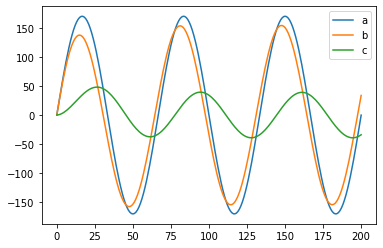

In [2]:
devices = Devices([
    VoltageSources("vs-gnd-a", "a", "gnd", 120, 0, 15),
    Resistors("r-1", "a", "b", 5),
    Inductors("i-1", "b", "c", 0.1),
    Resistors("r-2", "c", "gnd", 5)
])

results = solve(devices, Settings(simulationTime=0.2))

v_waveform_a = results.get_node_voltage("a")
v_waveform_b = results.get_node_voltage("b")
v_waveform_c = results.get_node_voltage("c")
#v_waveform_d = results.get_node_voltage("d")
#v_waveform_c = results.get_voltage_source_current("sensor-1")

print("amax:" + str(max(v_waveform_a)))
print("bmax:" + str(max(v_waveform_b)))
print("cmax:" + str(max(v_waveform_c)))

x = range(len(v_waveform_a))

#plt.clf()
plt.plot(x, v_waveform_a, label="a")
plt.plot(x, v_waveform_b, label="b")
plt.plot(x, v_waveform_c, label="c")
#plt.plot(x, v_waveform_d, label="d")
plt.legend()
plt.show()
